In [1]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from dredge import motion_util, dredge_ap

c:\Users\sangeetha\miniforge3\envs\motion\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Loading data

In [3]:
data = np.load('../data/dartsort_dataset1_p2_tstart750_tend1500.npz')
data.keys()

KeysView(NpzFile '../data/dartsort_dataset1_p2_tstart750_tend1500.npz' with keys: geom, denoised_amplitudes, times_seconds, depths_um)

Extracting probe contact position, splike amplitudes, depths, and peak time (s)

In [4]:
geom = data['geom']
amplitudes = data['denoised_amplitudes']
depths = data['depths_um']
times = data['times_seconds']

Plotting spike raster

Text(0, 0.5, 'depth (microns)')

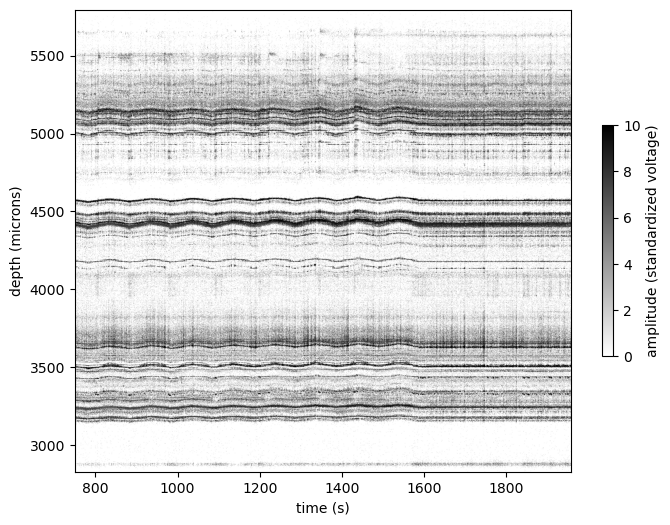

In [5]:
fig, ax = plt.subplots(figsize=(8, 6))
im = motion_util.show_spike_raster(amplitudes, depths, times, ax, aspect="auto", cmap=plt.cm.binary, vmax=10)
plt.colorbar(im[-1], ax=ax, label="amplitude (standardized voltage)", shrink=0.5)
plt.xlabel("time (s)")
plt.ylabel("depth (microns)")

### Running Non-Rigid Registration (Default)

In [6]:
motion_est, extra = dredge_ap.register(amplitudes, depths, times)
motion_est

Solve: 100%|██████████| 6/6 [00:01<00:00,  5.59it/s]


Understanding `motion_est` object

In [7]:
depths_bin = motion_est.spatial_bin_centers_um
depths_bin

array([3112.5, 3512.5, 3912.5, 4312.5, 4712.5, 5112.5, 5512.5])

In [8]:
times_bin = motion_est.time_bin_centers_s
times_bin

array([ 750.5,  751.5,  752.5, ..., 1954.5, 1955.5, 1956.5])

In [9]:
len(depths_bin), len(times_bin)

(7, 1207)

In [10]:
d = depths_bin[0]
disp = motion_est.disp_at_s(times_bin, depth_um=d, grid=True)
disp.shape

(1, 1207)

In [11]:
disp.squeeze()

array([-4.30943847, -4.31880038, -4.45318968, ..., -1.43136108,
       -1.32800418, -1.21943445])

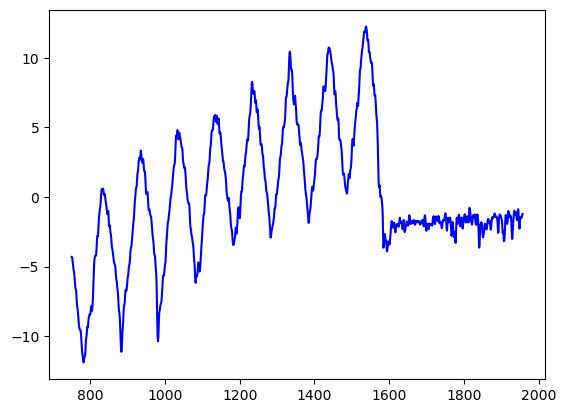

In [12]:
plt.plot(times_bin, disp.squeeze(), color='b')

Plotting displacement 

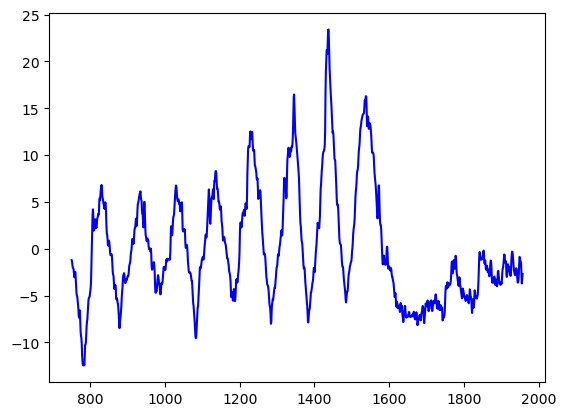

In [13]:
d = depths_bin[6]
disp = motion_est.disp_at_s(times_bin, depth_um=d, grid=True)
plt.plot(times_bin, disp.squeeze(), color='b')

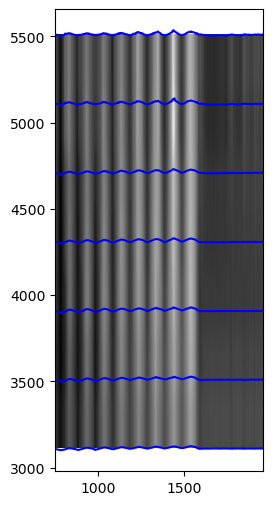

In [14]:
fig, ax = plt.subplots(figsize=(8, 6))

motion_util.show_displacement_heatmap(motion_est, ax, cmap='gray')
lines = motion_util.plot_me_traces(motion_est, ax, color='b')

Text(0, 0.5, 'depth (microns)')

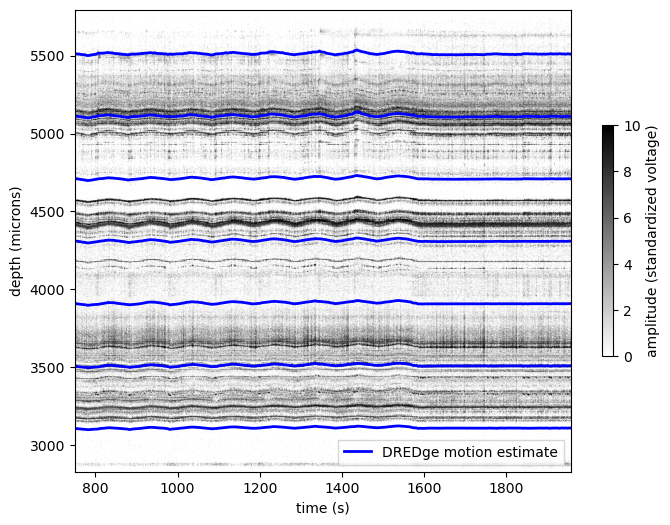

In [15]:
fig, ax = plt.subplots(figsize=(8, 6))

im = motion_util.show_spike_raster(amplitudes, depths, times, ax, aspect="auto", cmap=plt.cm.binary, vmax=10)
plt.colorbar(im[-1], ax=ax, label="amplitude (standardized voltage)", shrink=0.5)

lines = motion_util.plot_me_traces(motion_est, ax, label="DREDge motion estimate", color="b", lw=2)
plt.legend(fancybox=False, loc="lower right")

plt.xlabel("time (s)")
plt.ylabel("depth (microns)")

Motion corrected spike positions

In [16]:
registered_depths = motion_est.correct_s(times, depths)

Text(0, 0.5, 'depth (microns)')

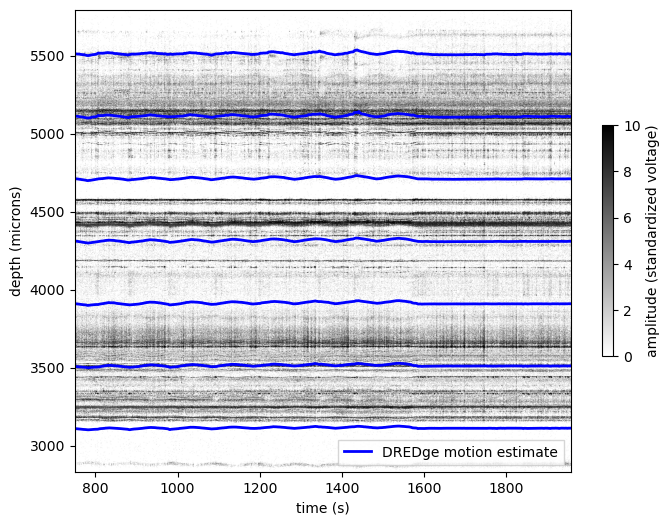

In [17]:
fig, ax = plt.subplots(figsize=(8, 6))

im = motion_util.show_spike_raster(amplitudes, registered_depths, times, ax, aspect="auto", cmap=plt.cm.binary, vmax=10)
plt.colorbar(im[-1], ax=ax, label="amplitude (standardized voltage)", shrink=0.5)

lines = motion_util.plot_me_traces(motion_est, ax, label="DREDge motion estimate", color="b", lw=2)
plt.legend(fancybox=False, loc="lower right")

plt.xlabel("time (s)")
plt.ylabel("depth (microns)")

In [18]:
extra.keys()

dict_keys(['mincorr', 'weights_orig', 'weights_thresh', 'Pind', 'windows', 'window_centers', 'max_disp_um'])

### Running Rigid Registration

In [19]:
motion_est, extra = dredge_ap.register(amplitudes, depths, times, rigid=True)
motion_est

Cross correlation: 100%|██████████| 1/1 [01:29<00:00, 89.47s/it]


In [20]:
times_bin = motion_est.time_bin_centers_s
times_bin

array([ 750.5,  751.5,  752.5, ..., 1954.5, 1955.5, 1956.5])

In [21]:
depths_bin = motion_est.spatial_bin_centers_um
depths_bin

Note: There is no spatial binning for rigid registration

In [22]:
displacement = motion_est.displacement
displacement

array([-3.04611221, -3.10552322, -3.31362116, ..., -2.85907757,
       -2.85217545, -2.74074527])

In [23]:
displacement.shape, times_bin.shape

((1207,), (1207,))

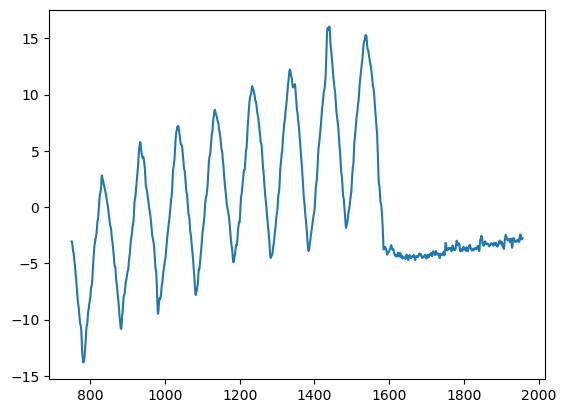

In [24]:
plt.plot(times_bin, displacement)

In [25]:
depths

array([3559.29495366, 3183.41049255, 3238.67028451, ..., 5470.5514778 ,
       5703.44255751, 4343.97601524])

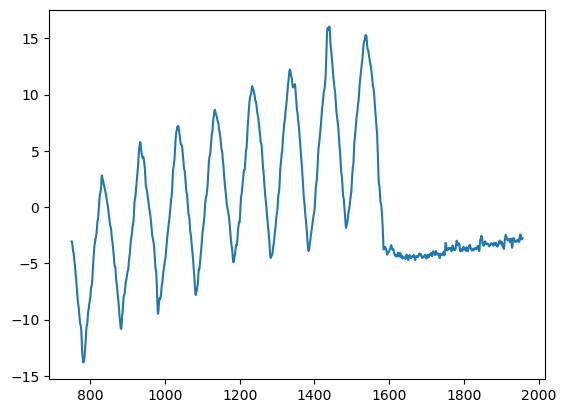

In [26]:
d = depths[0]
disp = motion_est.disp_at_s(times_bin, depth_um=d, grid=True)
plt.plot(times_bin, disp.squeeze())

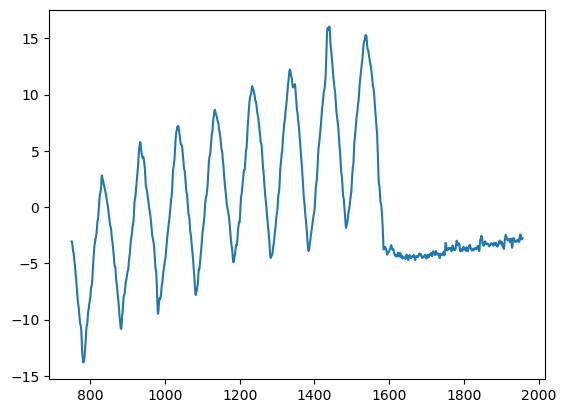

In [27]:
d = depths[10000]
disp = motion_est.disp_at_s(times_bin, depth_um=d, grid=True)
plt.plot(times_bin, disp.squeeze())

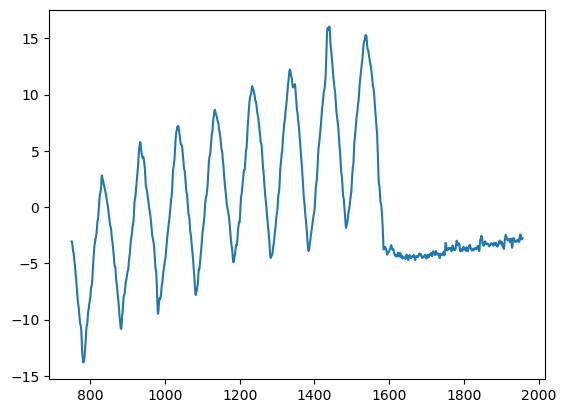

In [28]:
d = depths[-1]
disp = motion_est.disp_at_s(times_bin, depth_um=d, grid=True)
plt.plot(times_bin, disp.squeeze())

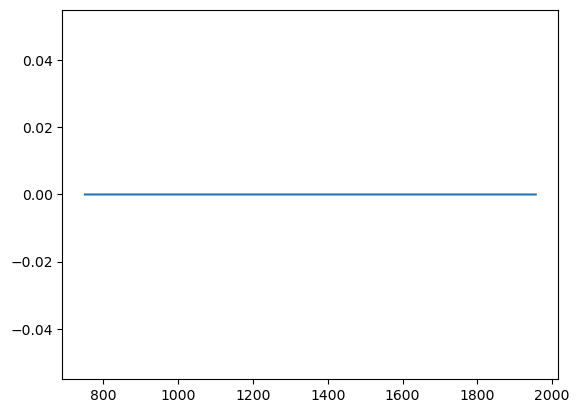

In [29]:
d1 = depths[0]
d2 = depths[-1]
disp1 = motion_est.disp_at_s(times_bin, depth_um=d1, grid=True)
disp2 = motion_est.disp_at_s(times_bin, depth_um=d2, grid=True)
plt.plot(times_bin, disp2.squeeze() - disp1.squeeze())

Text(0, 0.5, 'depth (microns)')

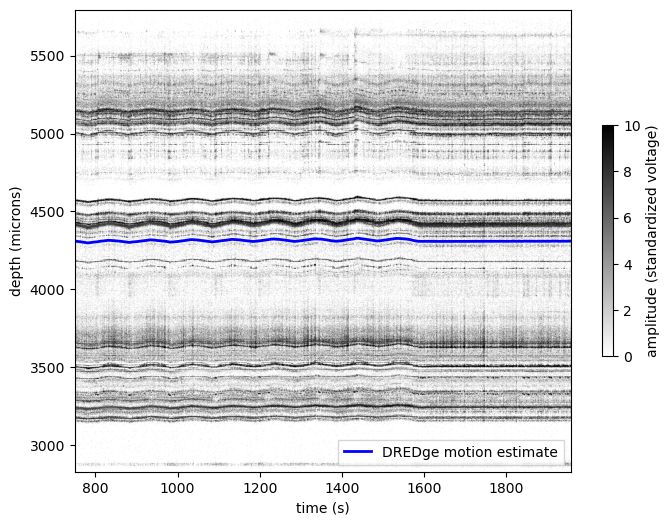

In [30]:
fig, ax = plt.subplots(figsize=(8, 6))

im = motion_util.show_spike_raster(amplitudes, depths, times, ax, aspect="auto", cmap=plt.cm.binary, vmax=10)
plt.colorbar(im[-1], ax=ax, label="amplitude (standardized voltage)", shrink=0.5)

lines = motion_util.plot_me_traces(motion_est, ax, label="DREDge motion estimate", color="b", lw=2)
plt.legend(fancybox=False, loc="lower right")

plt.xlabel("time (s)")
plt.ylabel("depth (microns)")

In [31]:
registered_depths = motion_est.correct_s(times, depths)

Text(0, 0.5, 'depth (microns)')

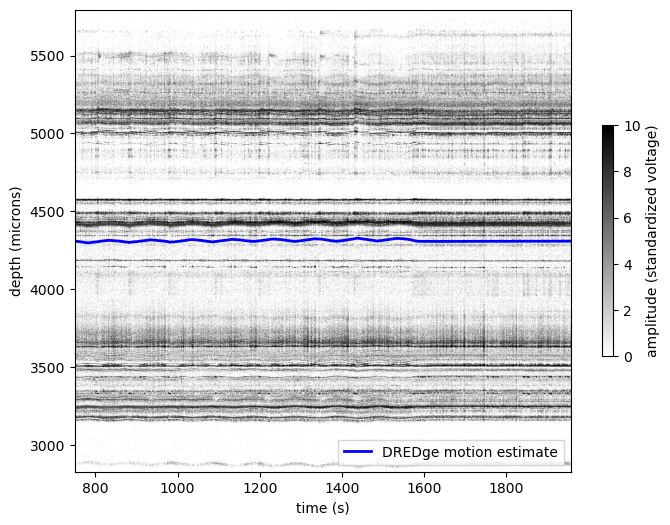

In [32]:
fig, ax = plt.subplots(figsize=(8, 6))

im = motion_util.show_spike_raster(amplitudes, registered_depths, times, ax, aspect="auto", cmap=plt.cm.binary, vmax=10)
plt.colorbar(im[-1], ax=ax, label="amplitude (standardized voltage)", shrink=0.5)

lines = motion_util.plot_me_traces(motion_est, ax, label="DREDge motion estimate", color="b", lw=2)
plt.legend(fancybox=False, loc="lower right")

plt.xlabel("time (s)")
plt.ylabel("depth (microns)")

### Comparing Rigid and Non-Rigid Motion Correction

In [33]:
motion_est_nr, extra = dredge_ap.register(amplitudes, depths, times)
registered_depths_nr = motion_est_nr.correct_s(times, depths)

Solve: 100%|██████████| 6/6 [00:01<00:00,  3.90it/s]


In [34]:
motion_est_r, extra = dredge_ap.register(amplitudes, depths, times, rigid=True)
registered_depths_r = motion_est_r.correct_s(times, depths)

Cross correlation: 100%|██████████| 1/1 [01:26<00:00, 86.48s/it]


In [35]:
diff = registered_depths_r - registered_depths_nr
diff.max(), diff.min()

(np.float64(13.26967046370919), np.float64(-5.635824798553585))

Text(0, 0.5, 'depth (microns)')

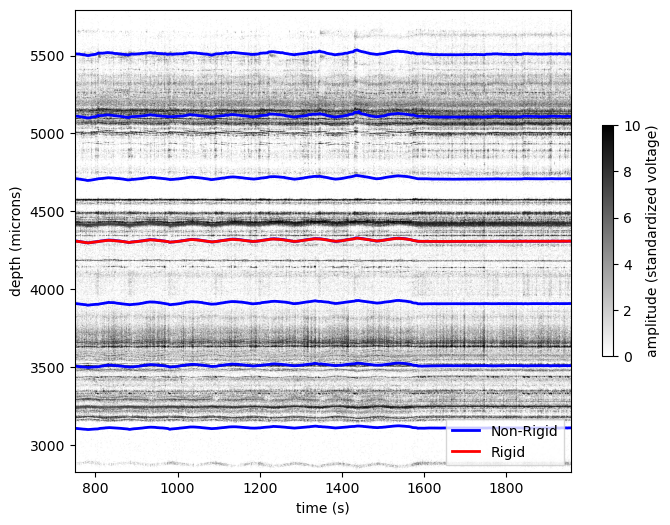

In [36]:
fig, ax = plt.subplots(figsize=(8, 6))

im = motion_util.show_spike_raster(amplitudes, registered_depths_nr, times, ax, aspect="auto", cmap=plt.cm.binary, vmax=10)
plt.colorbar(im[-1], ax=ax, label="amplitude (standardized voltage)", shrink=0.5)

lines = motion_util.plot_me_traces(motion_est_nr, ax, label="Non-Rigid", color="b", lw=2)
lines = motion_util.plot_me_traces(motion_est_r, ax, label="Rigid", color="r", lw=2)
plt.legend(fancybox=False, loc="lower right")

plt.xlabel("time (s)")
plt.ylabel("depth (microns)")

In [43]:
len(depths), len(registered_depths_nr), len(registered_depths_r), len(diff)

(1471315, 1471315, 1471315, 1471315)

c:\Users\sangeetha\miniforge3\envs\motion\Lib\site-packages\IPython\core\events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
c:\Users\sangeetha\miniforge3\envs\motion\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


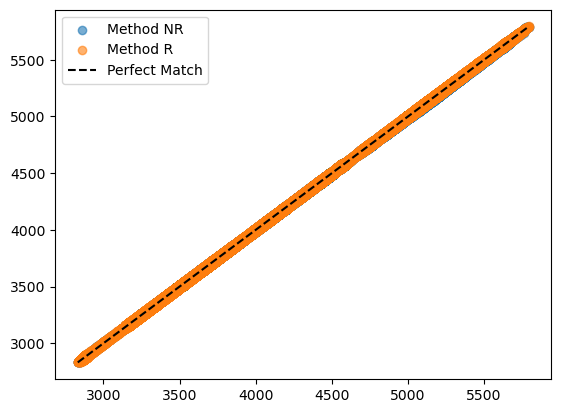

In [45]:
plt.scatter(depths, registered_depths_nr, label='Method NR', alpha=0.6)
plt.scatter(depths, registered_depths_r, label='Method R', alpha=0.6)
plt.plot([min(depths), max(depths)], [min(depths), max(depths)], 'k--', label='Perfect Match')
plt.legend()

C:\Users\sangeetha\AppData\Local\Temp\ipykernel_11784\949926200.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  heatmap_data = df.groupby(['depth_bin', 'time_bin'])['diff'].mean().unstack()


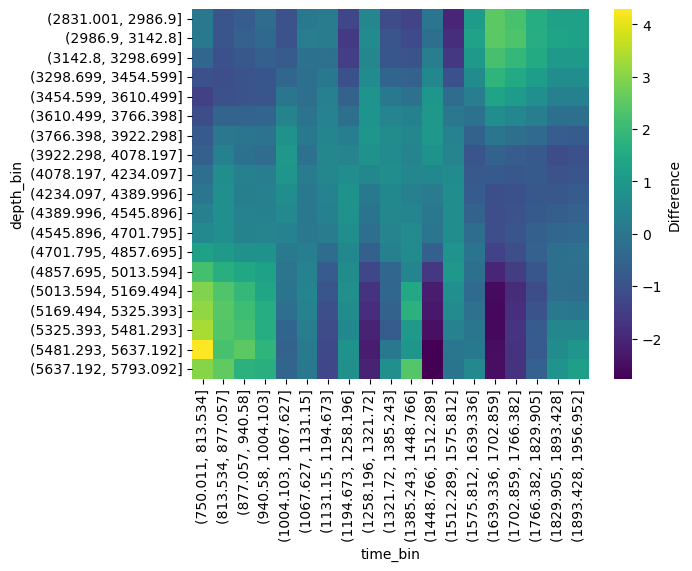

In [52]:
import pandas as pd
import seaborn as sns

df = pd.DataFrame({
    'time': times,
    'depth': depths,
    'diff': diff
})

time_bins = np.linspace(df['time'].min(), df['time'].max(), 20)
depth_bins = np.linspace(df['depth'].min(), df['depth'].max(), 20)

df['time_bin'] = pd.cut(df['time'], bins=time_bins)
df['depth_bin'] = pd.cut(df['depth'], bins=depth_bins)

df['time_bin'] = pd.cut(df['time'], bins=time_bins)
df['depth_bin'] = pd.cut(df['depth'], bins=depth_bins)

heatmap_data = df.groupby(['depth_bin', 'time_bin'])['diff'].mean().unstack()

sns.heatmap(heatmap_data, cmap='viridis', cbar_kws={'label': 'Difference'});
